<style>
  div {
    color: white;
    display: fill;
    border-radius: 8px;
    background-color: #323232; /* changed from #323232 */
    font-size: 150%;
    letter-spacing: 1.0px;
    transition: transform 0.3s;
  }

  div:hover {
    transform: scale(1.1);
  }

  p {
    padding: 15px;
    color: white;
  }

  span {
    color: #F1A424;
  }
</style>

<div>
  <p>
    <b><span> | </span>Modelling</b>
  </p>
</div>


In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set() # all plot will cover on seaborn style

In [6]:
df = pd.read_csv("cleaned_sbt_japan.csv")

df.head()

,car_brand,car_model,mileage_km,engine_size_cc,transmission,fuel_type,steering_type,drive_train,no_of_seats,no_of_doors,...,Power Steering,Air Conditioner,Navigation,Air Bag,Anti-Lock Brake System,Fog Lights,Power Windows,Alloy Wheels,year,price(Ksh)
0,AUDI,TT COUPE,56000.0,2000.0,Automatic Transmission,Petrol,RHD,4WD,4 Seats,3 Doors,...,1,1,0,1,0,0,1,1,2015,3407249.0
1,VOLKSWAGEN,GOLF,48000.0,1200.0,Automatic Transmission,Petrol,RHD,Other,5 Seats,5 Doors,...,1,1,0,1,0,0,1,1,2018,2390153.0
2,KIA,MOHAVE,37000.0,2959.0,Automatic Transmission,Diesel,LHD,4WD,7 Seats,4 Doors,...,1,1,0,1,0,0,1,1,2022,6545952.0
3,BMW,i3,51000.0,900.0,Automatic Transmission,Hybrid,RHD,Other,4 Seats,5 Doors,...,1,1,0,1,0,0,1,1,2016,2360003.0
4,GENESIS,G80,120000.0,2497.0,Automatic Transmission,Petrol,LHD,4WD,5 Seats,4 Doors,...,1,1,0,1,0,0,1,1,2020,5564201.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_brand               28000 non-null  object 
 1   car_model               28000 non-null  object 
 2   mileage_km              28000 non-null  float64
 3   engine_size_cc          28000 non-null  float64
 4   transmission            28000 non-null  object 
 5   fuel_type               28000 non-null  object 
 6   steering_type           28000 non-null  object 
 7   drive_train             28000 non-null  object 
 8   no_of_seats             28000 non-null  object 
 9   no_of_doors             28000 non-null  object 
 10  body_type               28000 non-null  object 
 11  Power Steering          28000 non-null  int64  
 12  Air Conditioner         28000 non-null  int64  
 13  Navigation              28000 non-null  int64  
 14  Air Bag                 28000 non-null

## <b><span style='color:#F1A424'>|</span> Data Preprocessing</b> 

### <b><span style='color:#F1A424'>|</span> Label Encoding</b> 

**Build a dictionary for each categorical column in my data. This dictionary will map each unique category label to a corresponding numerical value (dummy number). This will be useful later on when I create a web application.**

In [8]:
# creating dictionary for every categorical column
car_brand_dic = dict()
car_model_dic = dict()
car_transmission_dic = dict()
car_fuel_dic = dict()
car_steer_dic = dict()
car_drive_train_dic = dict()
car_seats_dic = dict()
car_doors_dic = dict()
car_body_dic = dict()

In [9]:
# Creating encoding column for categorical columns only
from sklearn.preprocessing import LabelEncoder
# creating an instance of the labelEncoder
le = LabelEncoder()

# Brand column
df['brand_encoded'] = le.fit_transform(df['car_brand'])
for num, lbl in enumerate(le.classes_):
    car_brand_dic[lbl] = num
print('Brand Label saved')

# Model column
df['model_encoded'] = le.fit_transform(df['car_model'])
for num, lbl in enumerate(le.classes_):
    car_model_dic[lbl] = num
print('Model Label saved')

# Transmission column
df['transmission_encoded'] = le.fit_transform(df['transmission'])
for num, lbl in enumerate(le.classes_):
    car_transmission_dic[lbl] = num
print('Transmission Label saved')

# Fuel column
df['fuel_encoded'] = le.fit_transform(df['fuel_type'])
for num, lbl in enumerate(le.classes_):
    car_fuel_dic[lbl] = num
print('Fuel Label saved')

# Steer column
df['steer_encoded'] = le.fit_transform(df['steering_type'])
for num, lbl in enumerate(le.classes_):
    car_steer_dic[lbl] = num
print('Steer Label saved')

# Drive Train column
df['drive_train_encoded'] = le.fit_transform(df['drive_train'])
for num, lbl in enumerate(le.classes_):
    car_drive_train_dic[lbl] = num
print('Drive Train Label saved')

# Seats column
df['seats_encoded'] = le.fit_transform(df['no_of_seats'])
for num, lbl in enumerate(le.classes_):
    car_seats_dic[lbl] = num
print('Seats Label saved')

# Doors column
df['doors_encoded'] = le.fit_transform(df['no_of_doors'])
for num, lbl in enumerate(le.classes_):
    car_doors_dic[lbl] = num
print('Doors Label saved')

# Body column
df['body_encoded'] = le.fit_transform(df['body_type'])
for num, lbl in enumerate(le.classes_):
    car_body_dic[lbl] = num
print('Body Label saved')

# Now drop the columns
df = df.drop(['car_brand', 'car_model', 'transmission', 'fuel_type', 'steering_type', 'drive_train', 'no_of_seats', 'no_of_doors', 'body_type'], axis=1)

Brand Label saved
Model Label saved
Transmission Label saved
Fuel Label saved
Steer Label saved
Drive Train Label saved
Seats Label saved
Doors Label saved
Body Label saved


In [10]:
df.head()

,mileage_km,engine_size_cc,Power Steering,Air Conditioner,Navigation,Air Bag,Anti-Lock Brake System,Fog Lights,Power Windows,Alloy Wheels,...,price(Ksh),brand_encoded,model_encoded,transmission_encoded,fuel_encoded,steer_encoded,drive_train_encoded,seats_encoded,doors_encoded,body_encoded
0,56000.0,2000.0,1,1,0,1,0,0,1,1,...,3407249.0,2,1593,0,3,1,1,1,1,0
1,48000.0,1200.0,1,1,0,1,0,0,1,1,...,2390153.0,51,591,0,3,1,2,2,3,1
2,37000.0,2959.0,1,1,0,1,0,0,1,1,...,6545952.0,28,987,0,0,0,1,3,2,3
3,51000.0,900.0,1,1,0,1,0,0,1,1,...,2360003.0,5,1783,0,2,1,2,1,3,1
4,120000.0,2497.0,1,1,0,1,0,0,1,1,...,5564201.0,21,540,0,3,0,1,2,2,2


In [11]:
df[df['model_encoded'] == 42]

,mileage_km,engine_size_cc,Power Steering,Air Conditioner,Navigation,Air Bag,Anti-Lock Brake System,Fog Lights,Power Windows,Alloy Wheels,...,price(Ksh),brand_encoded,model_encoded,transmission_encoded,fuel_encoded,steer_encoded,drive_train_encoded,seats_encoded,doors_encoded,body_encoded
195,14000.0,900.0,1,1,0,1,0,0,1,1,...,3013405.0,18,42,0,3,1,2,1,1,1
290,5000.0,1200.0,1,1,0,1,0,0,1,0,...,2650195.0,18,42,0,3,1,2,1,1,1
398,11000.0,1200.0,1,1,0,1,0,0,1,1,...,2239404.0,18,42,0,3,1,2,1,1,1
695,1000.0,900.0,1,1,0,1,0,0,1,1,...,3763538.0,18,42,0,3,1,2,1,1,1
861,1000.0,900.0,1,1,0,1,0,0,1,0,...,3276745.0,18,42,0,3,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27602,6000.0,1200.0,0,1,0,1,0,0,0,1,...,2840515.0,18,42,0,3,1,0,1,1,1
27844,7000.0,1200.0,1,1,0,1,0,0,1,0,...,2325143.0,18,42,0,3,1,2,1,1,1
27856,6000.0,1200.0,0,1,0,1,0,0,0,0,...,4883891.0,18,42,0,3,1,0,1,1,1
27865,42000.0,1200.0,1,1,0,1,0,0,1,1,...,2577333.0,18,42,0,3,1,2,1,1,1


## <b><span style='color:#F1A424'>|</span> Split</b> 
**Create a featute matrix named X. It should contain all the columns in the dataset except "price(Ksh)".**

**Create the target vector named y, which you'll use to train the model. Your target should be "price(Ksh)". Remember that, in most cases your target vector should be one-dimensional.**

In [12]:
X = df.drop(['price(Ksh)'], axis=1)
y = df['price(Ksh)']

X.shape, y.shape

((28000, 20), (28000,))

In [13]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22400, 20), (22400,), (5600, 20), (5600,))

## <b><span style='color:#F1A424'>|</span> Baseline Model</b> 
**Again, we need to set a baseline so we can evaluate a our model's performance. Calculate the mean of your target vector "y_train" and assign it to the variable "y_mean".**

In [14]:
y_mean = y_train.mean()
y_mean

5634746.992901785

**We then create a list of predicitons where everything is the mean over and over again.**

In [15]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[5634746.992901785,
 5634746.992901785,
 5634746.992901785,
 5634746.992901785,
 5634746.992901785]

**Calculate the baseline mean absolute error for your predicitons in "y_pred_baseline" as compared to the true targets in "y_train".**

In [16]:
from sklearn.metrics import mean_absolute_error

mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean price(Ksh)", round(y_mean, 2))
print("Baseline MAE", round(mae_baseline, 2))

Mean price(Ksh) 5634746.99
Baseline MAE 2048630.26


**What does this information tell us? If we always predicted that the target price(Ksh) is 5642453.17, our predictions would be off by an average of (Ksh) 2046669.63. It also tells us that our model needs to have a mean absolute error below (Ksh) 2046669.63 in order to be useful.**

## <b><span style='color:#F1A424'>|</span> Iterate</b> 

### <b><span style='color:#F1A424'>|</span> Random Forest Regressor</b> 

In [17]:
# importing RandomForest Regressior
from sklearn.ensemble import  RandomForestRegressor

# creating instance of randomforest regressor
rf_1 = RandomForestRegressor()

# checking the hyperparameter of the randomforest 
rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
# first i will create a base model then i will go for hyperparameter tuning.
rf_1.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
# checking the perofrmance on the training
y_pred_train = rf_1.predict(X_train)

# importing the rmse from sklearn
from sklearn.metrics import  mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))

RMSE on Traning data 428056.96467007266


In [20]:
# error on testing data
y_pred_test = rf_1.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

RMSE on Testing data 1040615.1030063746


In [21]:
# chceking the r2 score on traning data.
from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)

print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))

Traning Score: 0.9751127837771609


In [22]:
# chceking the socre for testing.

y_pred_test = rf_1.predict(X_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))

Testing Score: 0.851471398097003


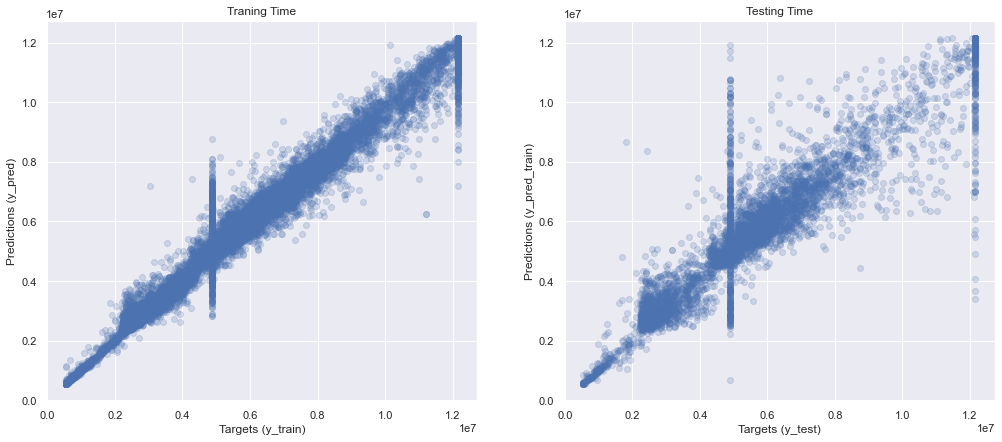

In [23]:
# plotting the traning
# check the prediction with the original values
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

# plotting testing error
y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');

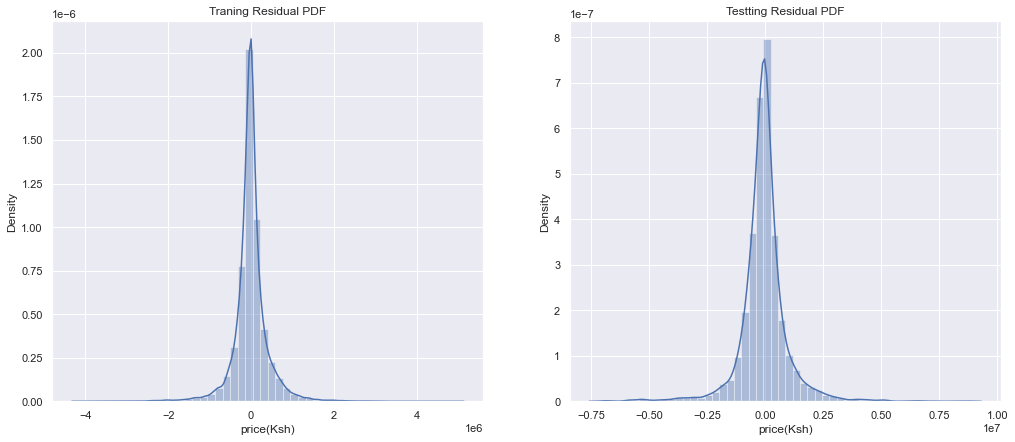

In [24]:
# plotting the distribution of the residual
residual_train = (y_train - rf_1.predict(X_train))
residual_test = (y_test - rf_1.predict(X_test))

# ploting the distribution of the residual on training
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Traning Residual PDF');

# ploting the distribution of the residual
plt.subplot(1,2,2)
sns.distplot(residual_test);
plt.title('Testting Residual PDF');

In [25]:
# Creating a dataframe to compare the result and prediction.
df_eval = pd.DataFrame(rf_1.predict(X_test), columns=['Prediction'])
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = y_test

# creating residual columns and difference column
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)
# checking the performance data 
df_eval



,Prediction,Tareget,Residual,Difference%
0,7.239962e+06,7746603.0,5.066406e+05,6.540165
1,3.644997e+06,3641525.0,-3.471511e+03,0.095331
2,3.231640e+06,3728677.0,4.970369e+05,13.330114
3,3.261506e+06,3022984.0,-2.385215e+05,7.890267
4,9.458806e+06,9840104.0,3.812975e+05,3.874934
...,...,...,...,...
5595,6.312553e+06,6545952.0,2.333986e+05,3.565541
5596,5.463530e+06,12155849.0,6.692319e+06,55.054308
5597,3.059100e+06,2337705.0,-7.213949e+05,30.859108
5598,6.104305e+06,4883891.0,-1.220414e+06,24.988553


In [26]:
# description of the eval_df
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,5.600000e+03,5.600000e+03,5.600000e+03,5600.000000
mean,5.669074e+06,5.614452e+06,-5.462154e+04,12.388511
std,2.522962e+06,2.700374e+06,1.039273e+06,16.582415
min,5.455220e+05,5.455220e+05,-7.021603e+06,0.000000
25%,3.660412e+06,3.678855e+06,-4.287153e+05,2.924619
50%,5.570048e+06,5.264901e+06,-4.596735e+04,7.305272
75%,6.899875e+06,6.793117e+06,2.906573e+05,15.392895
max,1.215585e+07,1.215585e+07,8.757095e+06,382.342005


In [27]:
# starting hyperparameter tuning

# performing hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# creating instance of RandomForest 
rf_random = RandomForestRegressor()

# creating random parameter
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None], # maximum number of levels in each decision tree
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 7],
 'n_estimators': [100,200]} # how many decision trees

# create an instance of randomsearch csv
rf_random = RandomizedSearchCV(estimator=rf_random,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=8,
                               n_jobs=-1)

# starting the search
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [28]:
rf_random.best_estimator_, rf_random.best_params_, rf_random.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                       min_samples_split=5, n_estimators=200),
 {'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 20,
  'bootstrap': False},
 0.860021006562882)

In [29]:
# checkig score of the randomly tune parameter
# checkng traning error
np.sqrt(mean_squared_error(y_train, rf_random.predict(X_train)))



506948.1446351135

In [30]:
# checking the testing error
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

1002970.0525485994

In [31]:
# importing gridseach cv
from sklearn.model_selection import GridSearchCV

# create an instance of new model
rf_grid_model = RandomForestRegressor()


param_grid =  {'bootstrap': [False],
  'max_depth': [25,30,35],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1,2],
  'min_samples_split': [1,2,3],
  'n_estimators': [100,150,200]}


# searchin for best paramete from neighbour of random search cv parameter
rf_grid = GridSearchCV(estimator=rf_grid_model,
                       param_grid=param_grid,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)


# fitting on data
rf_grid.fit(X_train, y_train)



Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [32]:
rf_grid.best_estimator_, rf_grid.best_params_, rf_grid.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=25, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=200),
 {'bootstrap': False,
  'max_depth': 25,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 3,
  'n_estimators': 200},
 0.8572185023530459)

In [33]:
# checkig score of the randomly tune parameter
# checkng traning error
np.sqrt(mean_squared_error(y_train, rf_grid.predict(X_train)))

632119.1640065843

In [34]:
# checking the testing error
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

1002970.0525485994

In [35]:
# create an instance of new model
rf_grid_model_2 = RandomForestRegressor()


param_grid_2 =  {'bootstrap': [False],
  'max_depth': [28,30,32],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [2,3,4],
  'n_estimators': [50,80,100]}


# searchin for best paramete from neighbour of random search cv parameter
rf_grid_2 = GridSearchCV(estimator=rf_grid_model_2,
                       param_grid=param_grid_2,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)


# fitting on data
rf_grid_2.fit(X_train, y_train)



Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [36]:


rf_grid_2.best_estimator_, rf_grid_2.best_params_, rf_grid_2.best_score_



(RandomForestRegressor(bootstrap=False, max_depth=28, max_features='sqrt',
                       min_samples_split=4, n_estimators=80),
 {'bootstrap': False,
  'max_depth': 28,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 80},
 0.8542335990834774)

In [37]:


# Checking traning error.
np.sqrt(mean_squared_error(y_train, rf_grid_2.predict(X_train)))



378876.3707728035

In [38]:


# checking testing error
np.sqrt(mean_squared_error(y_test, rf_grid_2.predict(X_test)))



1033268.7143720114

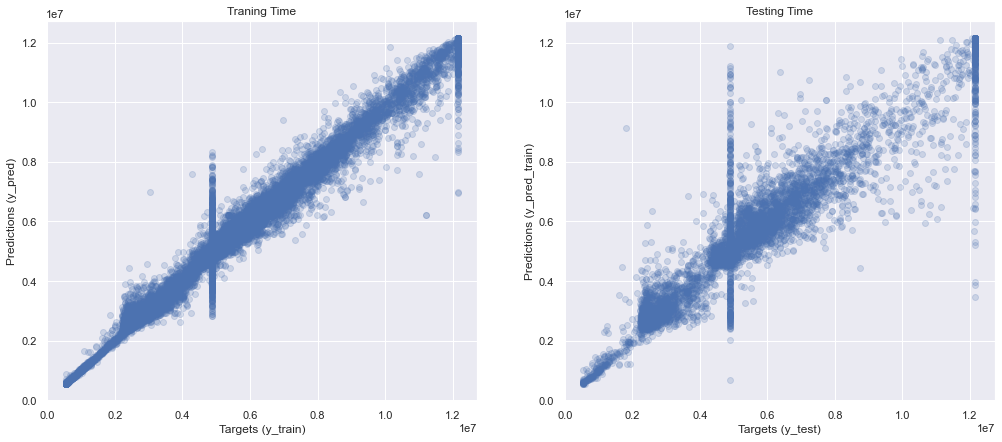

In [39]:
# plotting the traning
# check the prediction with the original values
plt.figure(figsize=(17,7))
y_pred_train = rf_grid_2.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

# plotting testing error
y_pred_test = rf_grid_2.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');



In [40]:


# checking the score of the last model
from sklearn.metrics import r2_score

print(f'Traning r2_score: {r2_score(y_train, rf_grid_2.predict(X_train))}')
print(f'Testing r2_score: {r2_score(y_test, rf_grid_2.predict(X_test))}')



Traning r2_score: 0.9805029804521269
Testing r2_score: 0.8535611184171642


### <b><span style='color:#F1A424'>|</span> XGBoost Regressor</b> 

In [41]:
# Use Xgboost Regressor
from xgboost import XGBRegressor

# creating instance of xgboost regressor
xgb = XGBRegressor()

# checking the hyperparameter of the xgboost
xgb.get_params()

# creating a dictionary of parameter
param_grid_xgb = {'n_estimators': [100,150,200],
                  'max_depth': [3,4,5],
                  'learning_rate': [0.1,0.2,0.3],
                  'booster': ['gbtree', 'gblinear', 'dart']}
# creating instance of gridsearchcv
xgb_grid = GridSearchCV(estimator=xgb,
                        param_grid=param_grid_xgb,
                        cv=3,
                        n_jobs=-1,
                        verbose=8)

# fitting the data
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [42]:
# # checking the peformance on the training
y_pred_train = xgb_grid.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))


RMSE on Traning data 815971.4944469369


In [43]:
# error on testing data
y_pred_test = xgb_grid.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

RMSE on Testing data 1004277.894716434


In [44]:
# use mean ablsoulte error on the training data
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_pred_train)

print('MAE on Traning data {}'.format(mae_train))


MAE on Traning data 527632.746797921


In [45]:
# use mean ablsoulte error on the testing data
mae_test = mean_absolute_error(y_test, y_pred_test)

print('MAE on Testing data {}'.format(mae_test))

MAE on Testing data 619155.7196833144


In [46]:
# chceking the socre on traning data.
from sklearn.metrics import r2_score

y_pred_train = xgb_grid.predict(X_train)

print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))

Traning Score: 0.9095677867136793


In [47]:
# chceking the score for testing.

y_pred_test = xgb_grid.predict(X_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))

Testing Score: 0.861663223841673


In [48]:
# chceking the socre on traning data.
# chceking the socre for testing.
# chceking the socre for baseline MAE.
# put the value into a dataframe

df_score = pd.DataFrame({'Model': ['RandomForest', 'RandomForest', 'RandomForest', 'XGBoost', 'XGBoost', 'XGBoost', 'Baseline'],
                            'Data': ['Traning', 'Testing', 'MAE', 'Traning', 'Testing', 'MAE', 'MAE'],
                            'Score': [r2_score(y_train, rf_grid_2.predict(X_train)), r2_score(y_test, rf_grid_2.predict(X_test)), mean_absolute_error(y_test, rf_grid_2.predict(X_test)), r2_score(y_train, xgb_grid.predict(X_train)), r2_score(y_test, xgb_grid.predict(X_test)), mean_absolute_error(y_test, xgb_grid.predict(X_test)), mae_baseline]})
df_score

,Model,Data,Score
0,RandomForest,Traning,9.805030e-01
1,RandomForest,Testing,8.535611e-01
2,RandomForest,MAE,6.236143e+05
3,XGBoost,Traning,9.095678e-01
4,XGBoost,Testing,8.616632e-01
5,XGBoost,MAE,6.191557e+05
6,Baseline,MAE,2.048630e+06


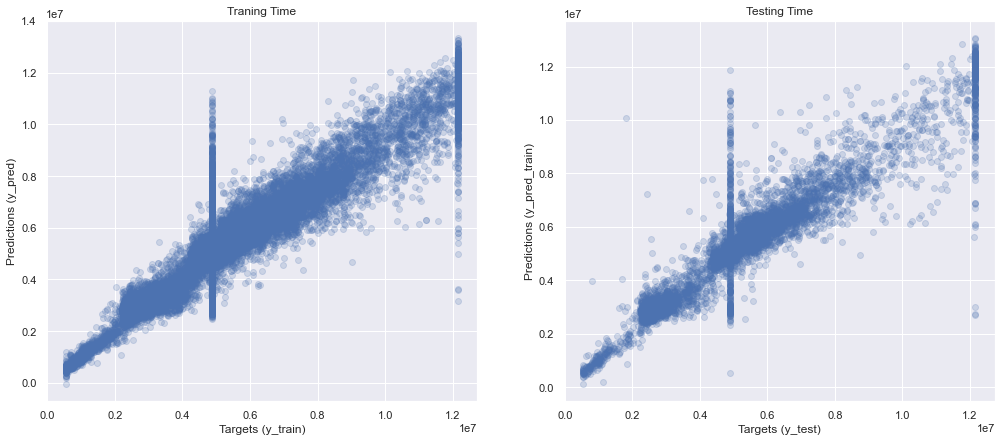

In [49]:
# plotting the traning
# check the prediction with the original values

plt.figure(figsize=(17,7))
y_pred_train = xgb_grid.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

# plotting testing error
y_pred_test = xgb_grid.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');

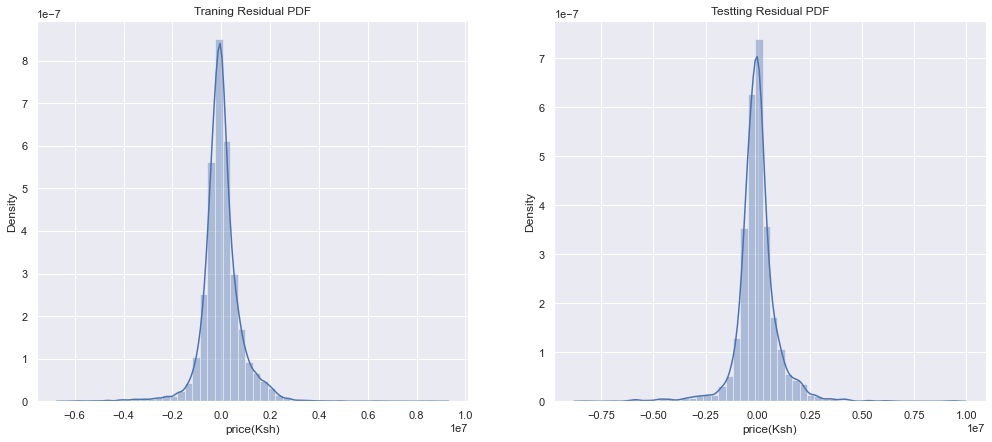

In [50]:
# plotting the distribution of the residual
residual_train = (y_train - xgb_grid.predict(X_train))
residual_test = (y_test - xgb_grid.predict(X_test))

# ploting the distribution of the residual on training
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Traning Residual PDF');

# ploting the distribution of the residual
plt.subplot(1,2,2)
sns.distplot(residual_test);
plt.title('Testting Residual PDF');

In [51]:
import joblib

joblib.dump(xgb_grid, 'xgb_model.pkl')

['xgb_model.pkl']

### Conclusion
Our methodology involved leveraging both Random Forest Regressor and XGBoost Regressor, accompanied by grid searches to optimize on their respective parameters, thereby enhancing their performance.

Initially, the Random Forest Regressor Model yielded an r2 score of 0.8514. However, after hyperparameter tuning the score improved to 0.8535, indicating a slight improvement in predictive accuracy.

Due to the improved scores we proceeded to evaluate our XGBoost model using the refined parameters obtained from the hyperparameter tuning process. Impressively, the XGBoost model demonstrated a superior performance with an r2 score of 0.8616.

Due to the improved scores we designated the XGBOOST model as our final model for subsequent analyses and applications.

We carried out Deployment and we used streamlit to build our web application. Our webapplication allows users to predict car prices. It also has personalization where the user can pick the kind if features he would want on the car.

To gain a comprehensive understanding of our project, we invite you to explore the presentation overview by executing the following command:run **streamlit run main.py**

To experience the full functionality of our application, allowing users to predict car prices and customize their preferred car features, please run the following command: **streamlit run app3.py**

Our interactive application provides a seamless interface for users to input car-related and receive predictions and also tailor their preferences to suit their individual needs